<a href="https://colab.research.google.com/github/ayushpandey1/Tweets_Classification/blob/master/TweetsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Description: This is a sentiment analysis program that parses the tweets fetched from Twitter using python

#import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
#Load the data
from google.colab import files
uploaded=files.upload() 

Saving Login.csv to Login.csv


In [3]:
#Get the data
log=pd.read_csv('Login.csv')


In [4]:
#Twitter API credentials
consumerKey=log['key'][0]
consumerSecret=log['key'][1]
accessToken=log['key'][2]
accessTokenSecret=log['key'][3]

In [5]:
#Create the authentication object
authenticate=tweepy.OAuthHandler(consumerKey,consumerSecret)

#set the access token and access token secret
authenticate.set_access_token(accessToken,accessTokenSecret)

#Create the API object while passing in the auth information
api=tweepy.API(authenticate,wait_on_rate_limit=True)

In [6]:
#Extract 100 tweets from the twitter user
posts=api.user_timeline(screen_name="BillGates",count=100,lang="en",tweet_mode="extended")

#print the last 5 tweets from the account
print("show the 5 recent tweets:\n")
i=1
for tweet in posts[0:5]:
  print(str(i)+ ') '+tweet.full_text+'\n')
  i=i+1

show the 5 recent tweets:

1) RT @UN: 6 months ago, Africa confirmed its first case of #COVID19. Since then, there have been 1 million cases, affecting every country on…

2) If we’re going to address climate change, we need to find new ways to do things that don’t release greenhouse gases—including how we move around. https://t.co/ElpoZs2ZHG

3) Today we move one step closer toward a world without polio. This is an incredible milestone that’s worth celebrating. It is also an important reminder of what can be accomplished when we work together toward a common goal. https://t.co/Exxks9jF4q

4) RT @gatesfoundation: Thanks to the commitment of leaders from all 47 countries in the @WHOAFRO Region, history was made today: the entire A…

5) Mosquito City is home to the world’s largest captive colony of mosquitoes. @IfakaraHealth Institute is doing fascinating research there about mosquito behaviors and finding ways to outsmart them. https://t.co/p3r11gMqdn



In [7]:
#Create a dataframe with a column called tweets
df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

#Show the first 5 rows of data
df.head()

,Tweets
0,"RT @UN: 6 months ago, Africa confirmed its fir..."
1,"If we’re going to address climate change, we n..."
2,Today we move one step closer toward a world w...
3,RT @gatesfoundation: Thanks to the commitment ...
4,Mosquito City is home to the world’s largest c...


In [8]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text)#removed @mentions
  text=re.sub(r'#','',text)#Removing the '#' symbol
  text=re.sub(r'RT[\s]+','',text)#Removing RT
  text=re.sub(r'https?:\/\/\S+','',text)#Remove the hyper links
  return text

#Cleaning the text
df['Tweets']=df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df

,Tweets
0,": 6 months ago, Africa confirmed its first cas..."
1,"If we’re going to address climate change, we n..."
2,Today we move one step closer toward a world w...
3,: Thanks to the commitment of leaders from all...
4,Mosquito City is home to the world’s largest c...
...,...
95,Lots of people in Seattle have asked how they ...
96,"Thanks for your leadership, . This is an inspi..."
97,Teachers are doing incredible work to keep kid...
98,I’m connecting live with and to talk about w...


In [9]:
#Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create 2 new columns
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,": 6 months ago, Africa confirmed its first cas...",0.666667,0.325000
1,"If we’re going to address climate change, we n...",0.454545,0.136364
2,Today we move one step closer toward a world w...,0.600000,0.300000
3,: Thanks to the commitment of leaders from all...,0.412500,0.100000
4,Mosquito City is home to the world’s largest c...,0.725000,0.450000
...,...,...,...
95,Lots of people in Seattle have asked how they ...,0.416667,0.377778
96,"Thanks for your leadership, . This is an inspi...",0.433333,0.233333
97,Teachers are doing incredible work to keep kid...,0.537500,0.350000
98,I’m connecting live with and to talk about w...,0.312500,0.068182


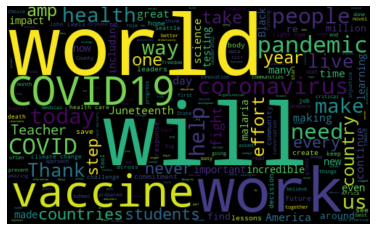

In [10]:
#Plot the word cloud
allWords=' '.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [11]:
#Create a function to compute the negative,neutral and positive analysis
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)

#show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,": 6 months ago, Africa confirmed its first cas...",0.666667,0.325000,Positive
1,"If we’re going to address climate change, we n...",0.454545,0.136364,Positive
2,Today we move one step closer toward a world w...,0.600000,0.300000,Positive
3,: Thanks to the commitment of leaders from all...,0.412500,0.100000,Positive
4,Mosquito City is home to the world’s largest c...,0.725000,0.450000,Positive
...,...,...,...,...
95,Lots of people in Seattle have asked how they ...,0.416667,0.377778,Positive
96,"Thanks for your leadership, . This is an inspi...",0.433333,0.233333,Positive
97,Teachers are doing incredible work to keep kid...,0.537500,0.350000,Positive
98,I’m connecting live with and to talk about w...,0.312500,0.068182,Positive


In [12]:
#Print all of the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+') '+sortedDF['Tweets'][i])
    print()
    j=j+1

1) : 6 months ago, Africa confirmed its first case of COVID19. Since then, there have been 1 million cases, affecting every country on…

2) If we’re going to address climate change, we need to find new ways to do things that don’t release greenhouse gases—including how we move around. 

3) Today we move one step closer toward a world without polio. This is an incredible milestone that’s worth celebrating. It is also an important reminder of what can be accomplished when we work together toward a common goal. 

4) : Thanks to the commitment of leaders from all 47 countries in the  Region, history was made today: the entire A…

5) Mosquito City is home to the world’s largest captive colony of mosquitoes.  Institute is doing fascinating research there about mosquito behaviors and finding ways to outsmart them. 

6) Deaths from malaria have been cut by more than half since the year 2000. Increased bed net use is one of the main reasons why  WorldMosquitoDay

7) Ridding the world of prevent

In [13]:
#print the negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+') '+ sortedDF['Tweets'][i])
    print()
    j=j+1

1) Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be disastrous for these young people and for the country. Here’s what we’re doing to help: 

2) : Three lessons that have been central to the COVID19 response in South Africa, Liberia, &amp; other countries:
🔸 Screening…

3) Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year.  founded _Tele to address this often-overlooked challenge. 

4) : “It’s that clarity of language about the VALUE of black life in America that distinguishes Juneteenth as emancipation…

5) : “Only those feigning blindness fail to see the body of work we are, and the work of body we have done. 

Everything is what it is…

6) : Juneteenth recognizes &amp; celebrates Black people’s freedom and the end of slavery in the US!  19 Jun 1865 Union Army Genera…

7) _Nyongo: 1. This is 

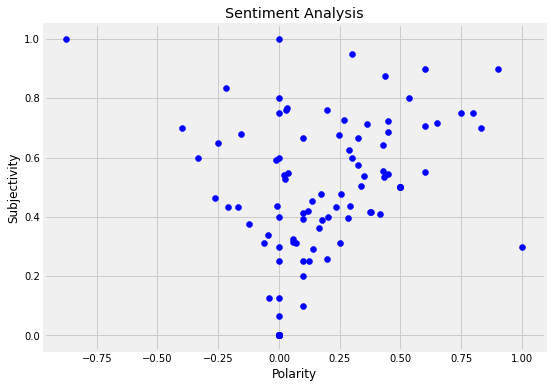

In [14]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [15]:
#get the % of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100,1)

64.0

In [16]:
#get the % of negative tweets
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Tweets']
round((ntweets.shape[0]/df.shape[0])*100,1)

15.0

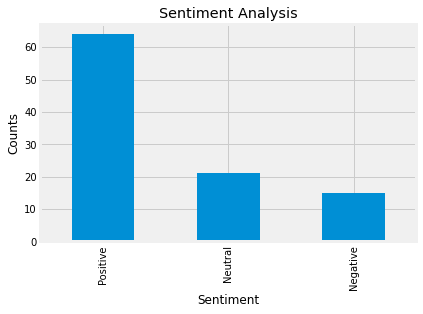

In [17]:
#Show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()